In [1]:
## This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


# class28_0713_review 

In [2]:
# 사용한 sklearn 모듈 모음

from sklearn.datasets import load_iris

### iris 데이터 세트

In [3]:
iris = load_iris()
# iris.data
# iris.target
print(dir(iris),"\n")
print("dtype: ", type(iris.data))
print("data.shape:", iris.data.shape)
print("target.shape:", iris.target.shape,"\n")
print("feature_names:", iris.feature_names)
print("target_names:", iris.target_names)

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names'] 

dtype:  <class 'numpy.ndarray'>
data.shape: (150, 4)
target.shape: (150,) 

feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target_names: ['setosa' 'versicolor' 'virginica']


<AxesSubplot:>

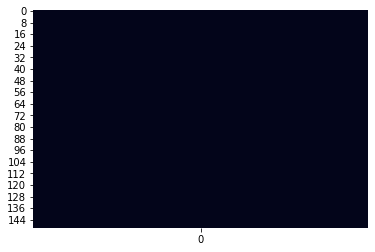

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# 결측치 확인
plt.figure()
# sns.heatmap(np.isnan(iris.data), cbar=False)
sns.heatmap(np.isnan(iris.target.reshape(-1,1)),cbar=False)

In [5]:
# 불균형 확인
np.unique(iris.target, return_counts=True )

(array([0, 1, 2]), array([50, 50, 50]))

## KNN 분류 모델

<AxesSubplot:>

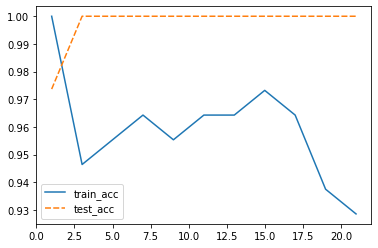

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=0)



train_acc = []
test_acc = []
k_nums = range(1,22,2)

for k in k_nums:
    
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
#     pred = model.predict(X_test)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))
    
    
dat = {"train_acc":train_acc, "test_acc":test_acc}
dat_df = pd.DataFrame(dat, index=k_nums)
sns.lineplot(data=dat_df, palette='tab10')

In [7]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([37, 37, 38]))

In [8]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([13, 13, 12]))

### bike 데이터 세트

In [9]:
train = pd.read_csv("/kaggle/input/bike-sharing-demand/train.csv", parse_dates=['datetime'])
test = pd.read_csv("/kaggle/input/bike-sharing-demand/test.csv", parse_dates=['datetime'])
sub = pd.read_csv("/kaggle/input/bike-sharing-demand/sampleSubmission.csv")

train.shape, test.shape

((10886, 12), (6493, 9))

In [10]:
# sub.head()
sub.shape

(6493, 2)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

sel = ['temp','atemp']

X_train = train[sel]
X_test = test[sel]

label_name = 'count'
y_train = train[label_name]

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
pred = model.predict(X_test)

pred.shape

(6493,)

In [12]:
sub['count'] = pred
sub.to_csv("knn_1st_submission.csv", index=False)
sub

,datetime,count
0,2011-01-20 00:00:00,39
1,2011-01-20 01:00:00,5
2,2011-01-20 02:00:00,5
3,2011-01-20 03:00:00,3
4,2011-01-20 04:00:00,3
...,...,...
6488,2012-12-31 19:00:00,3
6489,2012-12-31 20:00:00,3
6490,2012-12-31 21:00:00,3
6491,2012-12-31 22:00:00,5
